In [1]:
import pandas as pd
import os
import datetime as dt

### Prepare Dataset

#### Merging 12 months of sales data into a single CSV file

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [file for file in os.listdir('./Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/" + file)
    all_months_data = pd.concat([all_months_data, df])

#### Read in updated dataframe

In [3]:
all_data_df = pd.read_csv("all_data.csv")
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


In [4]:
all_data_df["Order Date"] = pd.to_datetime(all_data_df["Order Date"], format= "%m/%d/%y %H:%M", errors="coerce")

In [16]:
all_data_df["Quantity Ordered"] = pd.to_numeric(all_data_df["Quantity Ordered"])
all_data_df["Price Each"] = pd.to_numeric(all_data_df["Price Each"])

### Clean up the data 

#### Drop rows of NAN

In [5]:
nan_df = all_data_df[all_data_df.isna().any(axis=1)]
nan_df.head()

all_data_df = all_data_df.dropna(how="all")
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"


#### delete NaT value in order date column

In [6]:
nat_df = all_data_df[all_data_df["Order Date"].isna()]
nat_df

all_data_df = all_data_df[all_data_df["Order Date"].notna()]
all_data_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,2019-06-07 19:02:00,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,2019-06-01 19:29:00,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,2019-06-22 18:57:00,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,2019-06-26 18:35:00,"916 Main St, San Francisco, CA 94016"


#### Add additional columns for analysis

In [42]:
all_data_df["Order Month"] = all_data_df["Order Date"].dt.month.astype("category")

In [35]:
all_data_df["Sales"] = all_data_df["Quantity Ordered"] * all_data_df["Price Each"]

In [51]:
all_data_df["City"] = all_data_df["Purchase Address"].str.split(", ").str.get(1)

In [66]:
all_data_df["Hour"] = all_data_df["Order Date"].dt.hour
all_data_df["Minute"] = all_data_df["Order Date"].dt.minute

### Analysis

#### Q1: What was the best month for sales? How much was earned that month?

In [24]:
results = all_data_df.groupby("Order Month").sum(numeric_only=True)

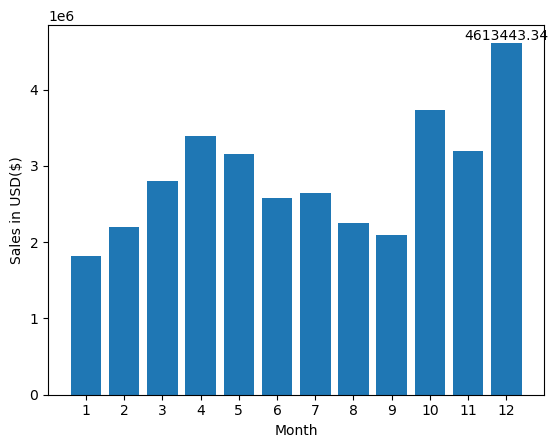

In [34]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.xlabel("Month")
plt.ylabel('Sales in USD($)')
plt.text(12, results["Sales"].max(), str(results["Sales"].max()), ha='center', va='bottom')
plt.show()

#### Q2: What City had the highest number of sales?

In [61]:
results = all_data_df.groupby("City").sum(numeric_only=True)
results

,Quantity Ordered,Price Each,Sales
City,,,
Atlanta,16602,2779908.20,2795498.58
Austin,11153,1809873.61,1819581.75
Boston,22528,3637409.77,3661642.01
Dallas,16730,2752627.82,2767975.40
Los Angeles,33289,5421435.23,5452570.80
New York City,27932,4635370.83,4664317.43
Portland,14053,2307747.47,2320490.61
San Francisco,50239,8211461.74,8262203.91
Seattle,16553,2733296.01,2747755.48


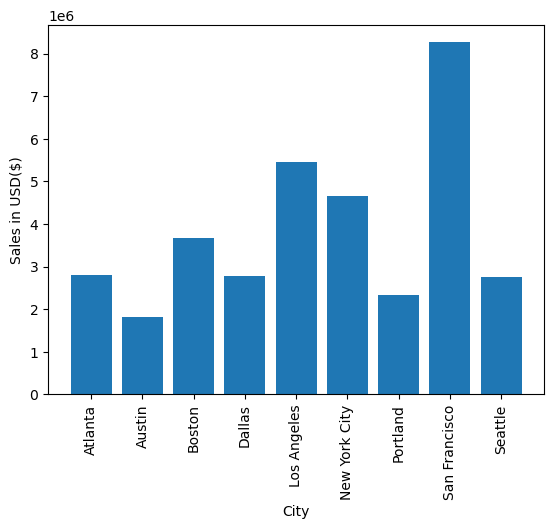

In [60]:
cities = results.index
plt.bar(cities, results["Sales"])
plt.xlabel("City")
plt.xticks(cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD($)')
plt.show()

#### Q3: What time should we display advertisements to maximize the likelihood of customer’s buying product?

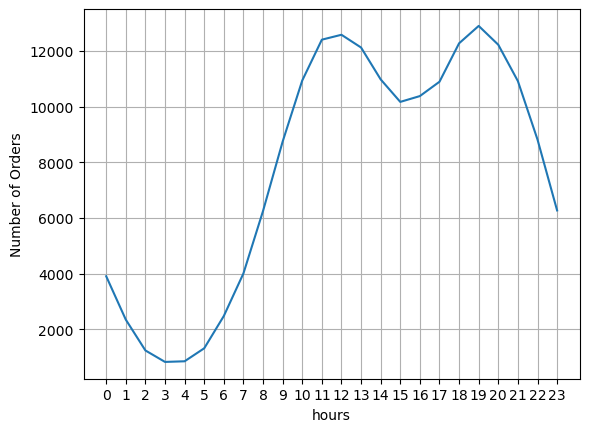

In [85]:
hour_sectors = all_data_df.groupby("Hour").count()
hours = hour_sectors.index
plt.plot(hours,hour_sectors["Sales"])
plt.xlabel("hours")
plt.xticks(hours)
plt.ylabel("Number of Orders")
plt.grid()
plt.show()

# recommend 11:00 and 19:00

#### Q4: What products are most often sold together?

In [95]:
# reshape dataframe to make products grouped in one row for each order id
dup_order_df = all_data_df[all_data_df["Order ID"].duplicated(keep=False)]
dup_order_df["Grouped Order Product"] = dup_order_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))
clean_df = dup_order_df[["Order ID","Grouped Order Product"]].drop_duplicates()
clean_df

/var/folders/bx/p3tq436x1531m2h9dh4yg07h0000gn/T/ipykernel_58159/2956604222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_order_df["Grouped Order Product"] = dup_order_df.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Grouped Order Product
16,295681,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,"Vareebadd Phone,USB-C Charging Cable"
42,295703,"AA Batteries (4-pack),Bose SoundSport Headphones"
66,295726,"iPhone,Lightning Charging Cable"
76,295735,"iPhone,Apple Airpods Headphones,Wired Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [102]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in clean_df["Grouped Order Product"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)


('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q5: What product sold the most? Why do you think it sold the most?

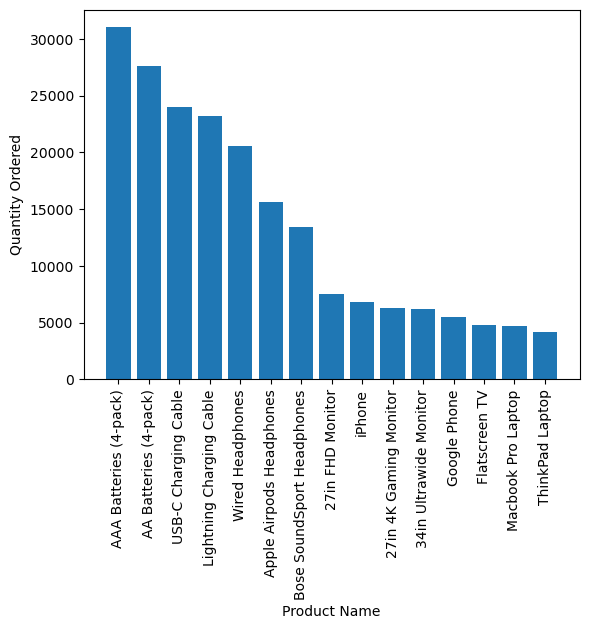

In [121]:
product_sectors = all_data_df.groupby("Product").sum(numeric_only=True).sort_values(by="Quantity Ordered",ascending=False).head(15)
products = product_sectors.index
plt.bar(products,product_sectors["Quantity Ordered"])
plt.xticks(products, rotation='vertical', size=10)
plt.xlabel("Product Name")
plt.ylabel("Quantity Ordered")
plt.show()

/var/folders/bx/p3tq436x1531m2h9dh4yg07h0000gn/T/ipykernel_58159/1763477426.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


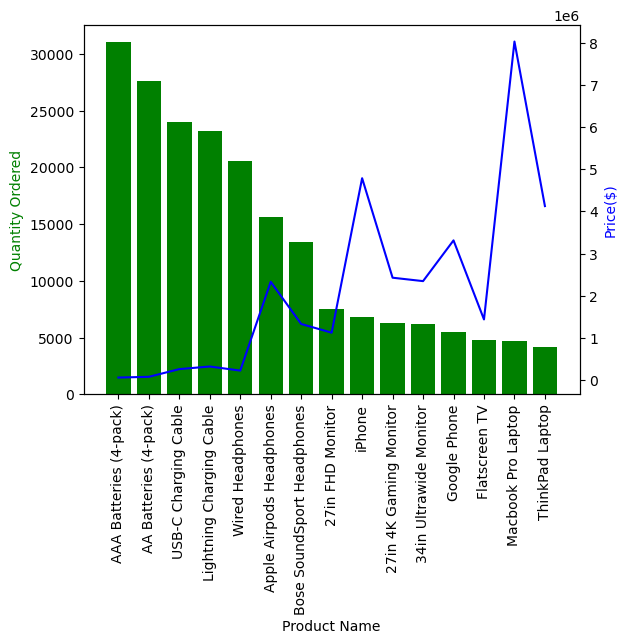

In [127]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, product_sectors["Quantity Ordered"], color='green')
ax2.plot(products, product_sectors["Price Each"], 'b-')

ax1.set_xlabel('Product Name')
ax1.set_xticklabels(products, rotation='vertical', size=10)
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price($)', color='b')
plt.show()

#從此資料集

In [128]:
all_data_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Hour,Minute
0,295665,Macbook Pro Laptop,1,1700.00,2019-12-30 00:01:00,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0,1
1,295666,LG Washing Machine,1,600.00,2019-12-29 07:03:00,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7,3
2,295667,USB-C Charging Cable,1,11.95,2019-12-12 18:21:00,"277 Main St, New York City, NY 10001",12,11.95,New York City,18,21
3,295668,27in FHD Monitor,1,149.99,2019-12-22 15:13:00,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15,13
4,295669,USB-C Charging Cable,1,11.95,2019-12-18 12:38:00,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12,38
